In [6]:
import pandas as pd

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final_project/data/cleaned.csv")

In [7]:
df = df.drop("Unnamed: 0", axis=1)

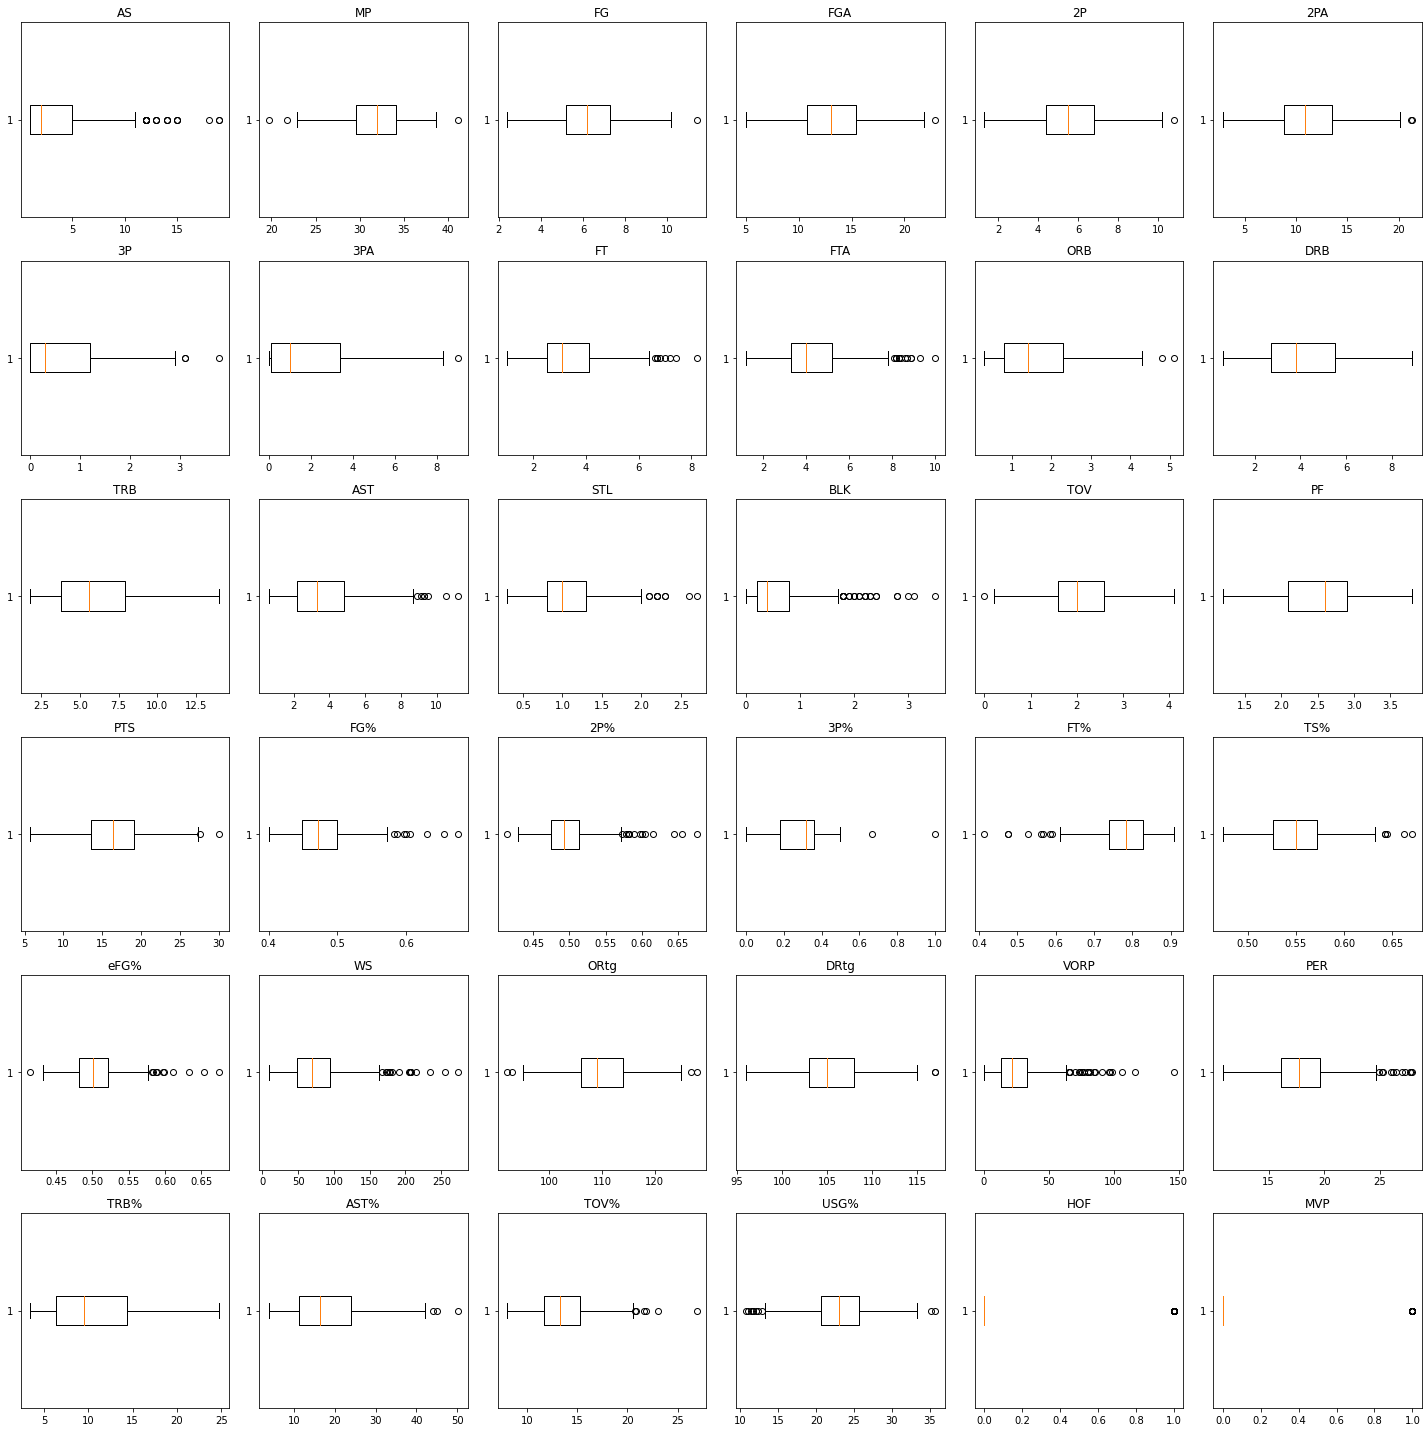

In [9]:
import matplotlib.pyplot as plt

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

# create a boxplot for each continuous variable
for ax, col in zip(axes.flatten(), df.select_dtypes(include=['float64', 'int64']).columns):
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

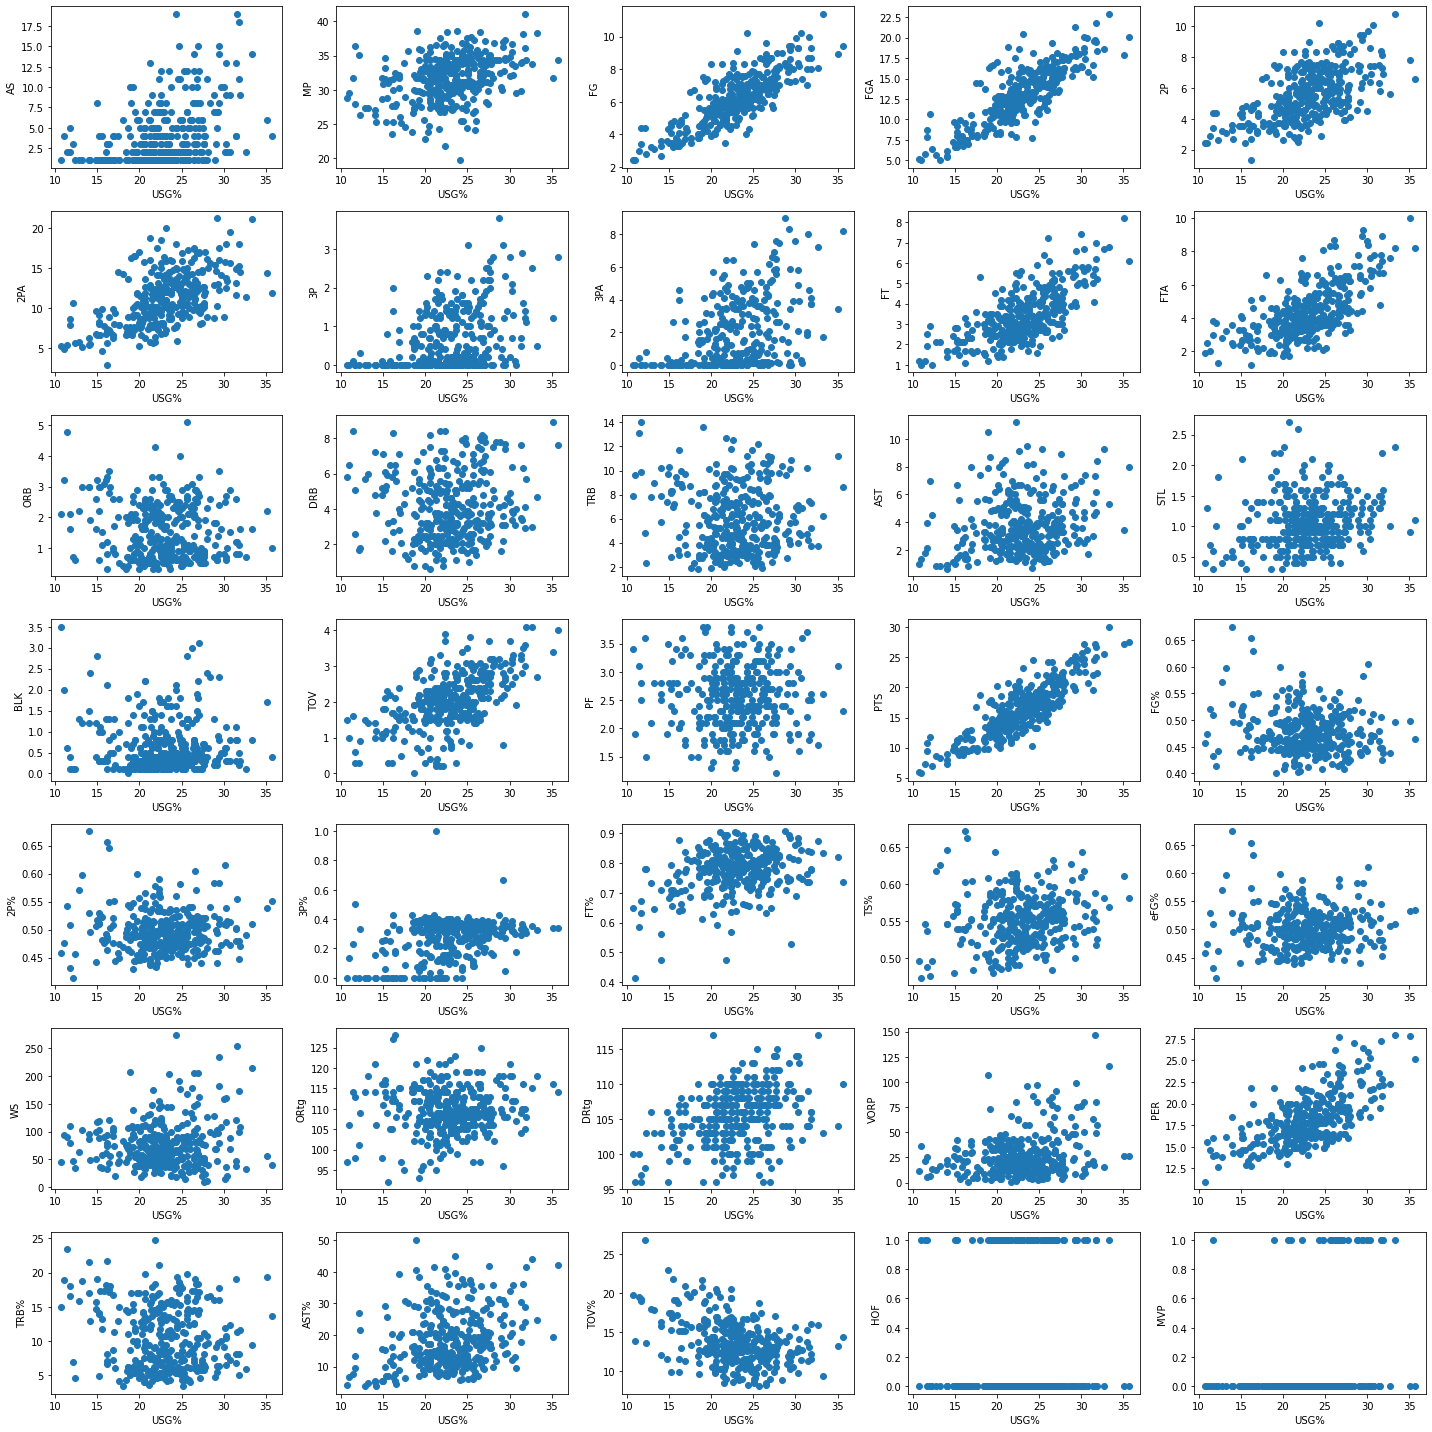

In [10]:
# select the columns to plot (all continuous variables and USG%)
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.remove('USG%')
cols.append('USG%')

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))

# create a scatter plot for each continuous variable in relation to USG%
for ax, col in zip(axes.flatten(), cols):
    ax.scatter(df['USG%'], df[col])
    ax.set_xlabel('USG%')
    ax.set_ylabel(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.savefig('scatterplots.png')
plt.show()

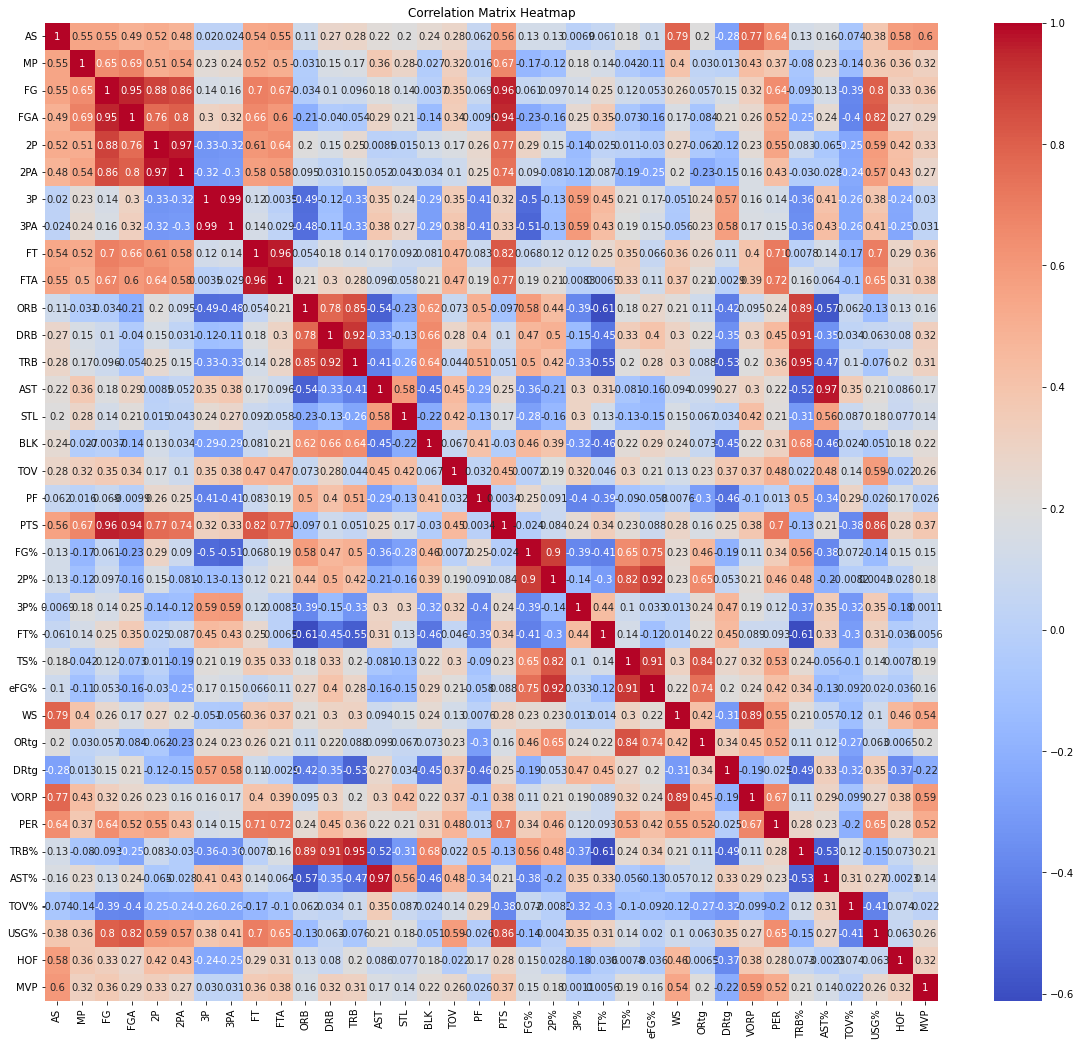

[('AS', 'WS'), ('AS', 'VORP'), ('FG', 'FGA'), ('FG', '2P'), ('FG', '2PA'), ('FG', 'PTS'), ('FG', 'USG%'), ('FGA', 'FG'), ('FGA', '2P'), ('FGA', '2PA'), ('FGA', 'PTS'), ('FGA', 'USG%'), ('2P', 'FG'), ('2P', 'FGA'), ('2P', '2PA'), ('2P', 'PTS'), ('2PA', 'FG'), ('2PA', 'FGA'), ('2PA', '2P'), ('3P', '3PA'), ('3PA', '3P'), ('FT', 'FTA'), ('FT', 'PTS'), ('FTA', 'FT'), ('FTA', 'PTS'), ('ORB', 'DRB'), ('ORB', 'TRB'), ('ORB', 'TRB%'), ('DRB', 'ORB'), ('DRB', 'TRB'), ('DRB', 'TRB%'), ('TRB', 'ORB'), ('TRB', 'DRB'), ('TRB', 'TRB%'), ('AST', 'AST%'), ('PTS', 'FG'), ('PTS', 'FGA'), ('PTS', '2P'), ('PTS', 'FT'), ('PTS', 'FTA'), ('PTS', 'USG%'), ('FG%', '2P%'), ('2P%', 'FG%'), ('2P%', 'TS%'), ('2P%', 'eFG%'), ('TS%', '2P%'), ('TS%', 'eFG%'), ('TS%', 'ORtg'), ('eFG%', '2P%'), ('eFG%', 'TS%'), ('WS', 'AS'), ('WS', 'VORP'), ('ORtg', 'TS%'), ('VORP', 'AS'), ('VORP', 'WS'), ('TRB%', 'ORB'), ('TRB%', 'DRB'), ('TRB%', 'TRB'), ('AST%', 'AST'), ('USG%', 'FG'), ('USG%', 'FGA'), ('USG%', 'PTS')]


In [12]:
import seaborn as sns
import numpy as np

# calculate the correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix with custom size
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, ax=ax)
plt.title("Correlation Matrix Heatmap")
plt.show()


# create a boolean mask for correlation coefficients greater than 0.75 or less than -0.75
mask = (corr_matrix > 0.75) | (corr_matrix < -0.75)

# filter the pairs of variables that meet the threshold
high_correlation_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*np.where(mask)) if i != j]

# print the pairs of variables with high correlation
print(high_correlation_pairs)